##### Machine Learning Course Project
# Exploratory Data Analysis
##### Darryl Abraham, Riccardo Paciello

### Importing Libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import fisher_exact, chi2_contingency
from sklearn.covariance import MinCovDet
from sklearn.impute import SimpleImputer

### Loading the Data

In [32]:
df = pd.read_csv('./data/cup98LRN.txt', sep = ',', chunksize=10000, low_memory=False)
df = pd.concat(df, axis='rows')

In [33]:
df.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Columns: 481 entries, ODATEDW to GEOCODE2
dtypes: float64(97), int64(310), object(74)
memory usage: 350.1+ MB


In [35]:
df.dtypes

ODATEDW       int64
OSOURCE      object
TCODE         int64
STATE        object
ZIP          object
             ...   
MDMAUD_R     object
MDMAUD_F     object
MDMAUD_A     object
CLUSTER2    float64
GEOCODE2     object
Length: 481, dtype: object

In [36]:
id = ['CONTROLN']
num_feats = ['ODATEDW', 'DOB', 'AGE', 'NUMCHLD', 'INCOME', 'HIT', 'MBCRAFT', "MBGARDEN", "MBBOOKS", "MBCOLECT", "MAGFAML", "MAGFEM", "MAGMALE", "PUBGARDN", "PUBCULIN", "PUBHLTH", "PUBDOITY", "PUBNEWFN", "PUBPHOTO", "PUBOPP", 'MALEMILI', 'MALEVET', 'VIETVETS', 'WWIIVETS', 'LOCALGOV', 'STATEGOV', 'FEDGOV', 'POP901', 'POP902', 'POP903', 'POP90C1', 'POP90C2', 'POP90C3', 'POP90C4', 'POP90C5', 'ETH1', 'ETH2', 'ETH3', 'ETH4', 'ETH5', 'ETH6', 'ETH7', 'ETH8', 'ETH9', 'ETH10', 'ETH11', 'ETH12', 'ETH13', 'ETH14', 'ETH15', 'ETH16', 'AGE901', 'AGE902', 'AGE903', 'AGE904', 'AGE905', 'AGE906', 'AGE907', 'CHIL1', 'CHIL2', 'CHIL3', 'AGEC1', 'AGEC2', 'AGEC3', 'AGEC4', 'AGEC5', 'AGEC6', 'AGEC7', 'CHILC1', 'CHILC2', 'CHILC3', 'CHILC4', 'CHILC5', "HHAGE1", "HHAGE2", "HHAGE3", "HHN1", "HHN2", "HHN3", "HHN4", "HHN5", "HHN6", "MARR1", "MARR2", "MARR3", "MARR4", "HHP1", "HHP2", "DW1", "DW2", "DW3", "DW4", "DW5", "DW6", "DW7", "DW8", "DW9", "HV1", "HV2", "HV3", "HV4", "HU1", "HU2", "HU3", "HU4", "HU5", "HHD1", "HHD2", "HHD3", "HHD4", "HHD5", "HHD6", "HHD7", "HHD8", "HHD9", "HHD10", "HHD11", "HHD12", "ETHC1", "ETHC2", "ETHC3", "ETHC4","ETHC5", "ETHC6", "HVP1", "HVP2", "HVP3", "HVP4", "HVP5", "HVP6", "HUR1", "HUR2", "RHP1", "RHP2", "RHP3", "RHP4", "HUPA1", "HUPA2", "HUPA3", "HUPA4", "HUPA5", "HUPA6", "HUPA7", "RP1", "RP2", "RP3", "RP4", "IC1", "IC2", "IC3", "IC4", "IC5", "IC6", "IC7", "IC8", "IC9", "IC10", "IC11", "IC12", "IC13", "IC14", "IC15", "IC16", "IC17", "IC18", "IC19", "IC20", "IC21", "IC22", "IC23", "HHAS1", "HHAS2", "HHAS3", "HHAS4", "MC1", "MC2", "MC3", "TPE1", "TPE2", "TPE3", "TPE4", "TPE5", "TPE6", "TPE7", "TPE8", "TPE9", "PEC1", "PEC2", "TPE10", "TPE11", "TPE12", "TPE13", "LFC1", "LFC2", "LFC3", "LFC4", "LFC5", "LFC6", "LFC7", "LFC8", "LFC9", "LFC10", "OCC1", "OCC2", "OCC3", "OCC4", "OCC5", "OCC6", "OCC7", "OCC8", "OCC9", "OCC10", "OCC11", "OCC12", "OCC13", "EIC1", "EIC2", "EIC3", "EIC4", "EIC5", "EIC6", "EIC7", "EIC8", "EIC9", "EIC10", "EIC11", "EIC12", "EIC13", "EIC14", "EIC15", "EIC16", "OEDC1", "OEDC2", "OEDC3", "OEDC4", "OEDC5", "OEDC6", "OEDC7", "EC1", "EC2", "EC3", "EC4", "EC5", "EC6", "EC7", "EC8", "SEC1", "SEC2", "SEC3", "SEC4", "SEC5", "AFC1", "AFC2", "AFC3", "AFC4", "AFC5", "AFC6", "VC1", "VC2", "VC3", "VC4", "ANC1", "ANC2", "ANC3", "ANC4", "ANC5", "ANC6", "ANC7", "ANC8", "ANC9", "ANC10", "ANC11", "ANC12", "ANC13", "ANC14", "ANC15", "POBC1", "POBC2", "LSC1", "LSC2", "LSC3", "LSC4", "VOC1", "VOC2", "VOC3", "HC1", "HC2", "HC3", "HC4", "HC5", "HC6", "HC7", "HC8", "HC9", "HC10", "HC11", "HC12", "HC13", "HC14", "HC15", "HC16", "HC17", "HC18", "HC19", "HC20", "HC21", "MHUC1", "MHUC2", "AC1", "AC2", 'CARDPROM', 'NUMPROM', 'CARDPM12', 'NUMPRM12', "RAMNT_3", "RAMNT_4", "RAMNT_5", "RAMNT_6", "RAMNT_7", "RAMNT_8", "RAMNT_9", "RAMNT_10", "RAMNT_11", "RAMNT_12", "RAMNT_13", "RAMNT_14", "RAMNT_15", "RAMNT_16", "RAMNT_17", "RAMNT_18", "RAMNT_19", "RAMNT_20", "RAMNT_21", "RAMNT_22", "RAMNT_23", "RAMNT_24", "RAMNTALL", "NGIFTALL", "CARDGIFT", "MINRAMNT", "MINRDATE", "MAXRAMNT", "MAXRDATE", "LASTGIFT", "LASTDATE", "FISTDATE", "NEXTDATE", "TIMELAG", "AVGGIFT", "ADATE_2", "ADATE_3", "ADATE_4", "ADATE_5", "ADATE_6", "ADATE_7", "ADATE_8", "ADATE_9", "ADATE_10", "ADATE_11", "ADATE_12", "ADATE_13", "ADATE_14", "ADATE_15", "ADATE_16", "ADATE_17", "ADATE_18", "ADATE_19", "ADATE_20", "ADATE_21", "ADATE_22", "ADATE_23", "ADATE_24"]
cat_feats = ['OSOURCE', 'TCODE', 'STATE', 'ZIP', 'MAILCODE', 'PVASTATE', 'NOEXCH', 'RECINHSE', 'RECP3', 'RECPGVG', 'RECSWEEP', 'MDMAUD', 'DOMAIN', 'CLUSTER', 'AGEFLAG', 'HOMEOWNR', 'CHILD03', 'CHILD07', 'CHILD12', 'CHILD18', 'GENDER', 'WEALTH1', 'DATASRCE', 'SOLP3', 'SOLIH', 'MAJOR', 'WEALTH2', 'GEOCODE', 'COLLECT1', 'VETERANS', 'BIBLE', 'CATLG', 'HOMEE', 'PETS', 'CDPLAY', 'STEREO', 'PCOWNERS', 'PHOTO', 'CRAFTS', 'FISHER', 'GARDENIN', 'BOATS', 'WALKER', 'KIDSTUFF', 'CARDS', 'PLATES', 'LIFESRC', 'PEPSTRFL', "MSA", "ADI", "DMA", "RFA_2", "RFA_3", "RFA_4", "RFA_5", "RFA_6", "RFA_7", "RFA_8", "RFA_9", "RFA_10", "RFA_11", "RFA_12", "RFA_13", "RFA_14", "RFA_15", "RFA_16", "RFA_17", "RFA_18", "RFA_19", "RFA_20", "RFA_21", "RFA_22", "RFA_23", "RFA_24", 'MAXADATE', 'HPHONE_D', "RFA_2R", "RFA_2F", "RFA_2A", "MDMAUD_R", "MDMAUD_F", "MDMAUD_A", 'CLUSTER2', 'GEOCODE2']
ordinal_feats = ['DOMAIN', 'WEALTH1', 'SOLP3', 'SOLIH', 'WEALTH2', "RFA_2", "RFA_3", "RFA_4", "RFA_5", "RFA_6", "RFA_7", "RFA_8", "RFA_9", "RFA_10", "RFA_11", "RFA_12", "RFA_13", "RFA_14", "RFA_15", "RFA_16", "RFA_17", "RFA_18", "RFA_19", "RFA_20", "RFA_21", "RFA_22", "RFA_23", "RFA_24", "RFA_2R", "RFA_2F", "RFA_2A", "MDMAUD_R", "MDMAUD_F", "MDMAUD_A"]
targets = ['TARGET_B', 'TARGET_D']

### Univariate Data Analysis

In [37]:
df.columns

Index(['ODATEDW', 'OSOURCE', 'TCODE', 'STATE', 'ZIP', 'MAILCODE', 'PVASTATE',
       'DOB', 'NOEXCH', 'RECINHSE',
       ...
       'TARGET_D', 'HPHONE_D', 'RFA_2R', 'RFA_2F', 'RFA_2A', 'MDMAUD_R',
       'MDMAUD_F', 'MDMAUD_A', 'CLUSTER2', 'GEOCODE2'],
      dtype='object', length=481)

In [38]:
df.describe()

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,...,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
count,95412.000000,95412.000000,95412.000000,71747.000000,12386.000000,74126.000000,50680.000000,95412.000000,42558.000000,42558.000000,...,95412.000000,85439.000000,85439.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95280.000000
mean,9141.363256,54.223117,2723.602933,61.611649,1.527773,3.886248,5.345699,3.321438,0.152075,0.059166,...,9135.651648,9151.022917,8.093739,13.347786,95778.176959,0.050759,0.793073,0.500618,1.910053,31.533711
std,343.454752,953.844476,2132.241295,16.664199,0.806861,1.854960,2.742490,9.306899,0.470023,0.262078,...,320.394019,294.257260,8.213242,10.769997,55284.596094,0.219506,4.429725,0.500002,1.072749,18.764614
min,8306.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,7211.000000,0.000000,1.285714,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,8801.000000,0.000000,201.000000,48.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,...,8810.000000,8903.000000,4.000000,8.384615,47910.750000,0.000000,0.000000,0.000000,1.000000,15.000000
50%,9201.000000,1.000000,2610.000000,62.000000,1.000000,4.000000,6.000000,0.000000,0.000000,0.000000,...,9201.000000,9204.000000,6.000000,11.636364,95681.500000,0.000000,0.000000,1.000000,2.000000,32.000000
75%,9501.000000,2.000000,4601.000000,75.000000,2.000000,5.000000,8.000000,3.000000,0.000000,0.000000,...,9409.000000,9409.000000,11.000000,15.477955,143643.500000,0.000000,0.000000,1.000000,3.000000,49.000000
max,9701.000000,72002.000000,9710.000000,98.000000,7.000000,7.000000,9.000000,241.000000,6.000000,4.000000,...,9603.000000,9702.000000,1088.000000,1000.000000,191779.000000,1.000000,200.000000,1.000000,4.000000,62.000000


In [39]:
# Number of missing values per feature
abs_null = df.isna().sum()
rel_null = df.isna().sum()/len(df)
pd.concat([abs_null, rel_null], axis=1, keys=['Absolute', 'Relative'])

,Absolute,Relative
ODATEDW,0,0.000000
OSOURCE,0,0.000000
TCODE,0,0.000000
STATE,0,0.000000
ZIP,0,0.000000
...,...,...
MDMAUD_R,0,0.000000
MDMAUD_F,0,0.000000
MDMAUD_A,0,0.000000
CLUSTER2,132,0.001383


In [40]:
# Number of modalities per feature
modalities = df.nunique()
modalities

ODATEDW        54
OSOURCE       896
TCODE          55
STATE          57
ZIP         19938
            ...  
MDMAUD_R        5
MDMAUD_F        4
MDMAUD_A        5
CLUSTER2       62
GEOCODE2        5
Length: 481, dtype: int64

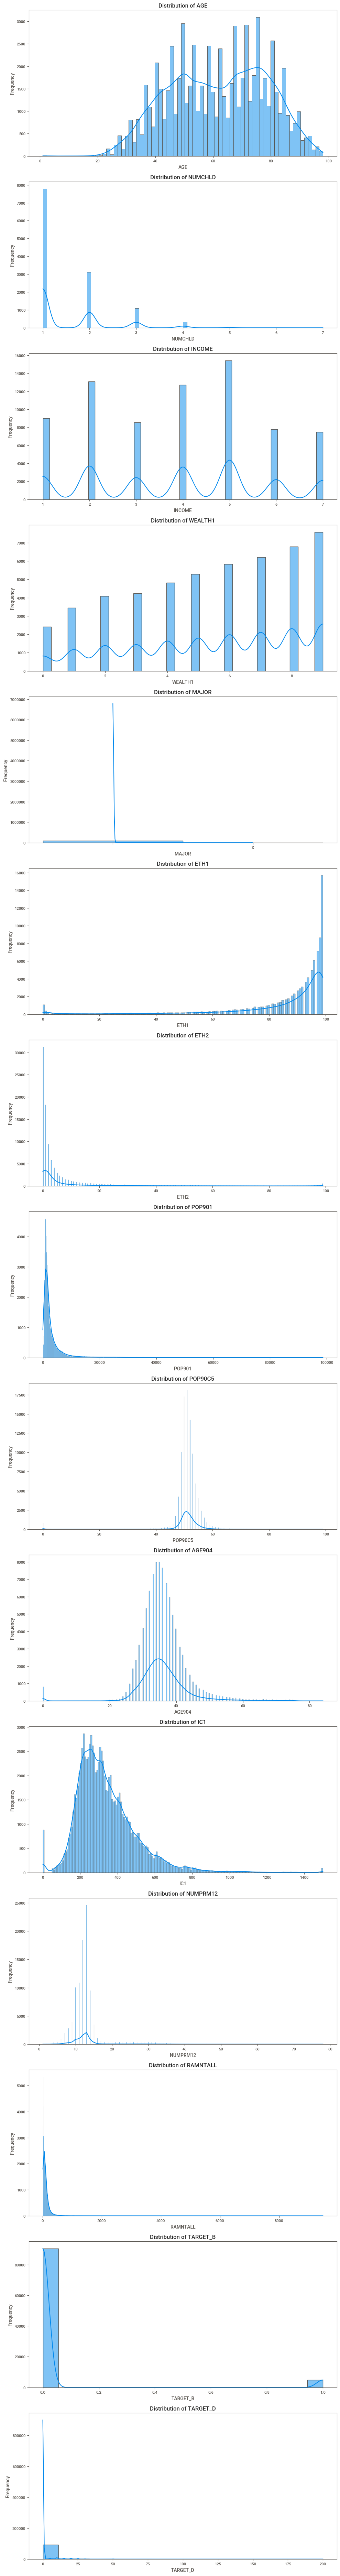

In [41]:
# Plotting the distribution of the columns
# Select columns to plot:
columns_to_plot = ['AGE', 'NUMCHLD', 'INCOME', 'WEALTH1', 'MAJOR', 'ETH1', 'ETH2', 'POP901', 'POP90C5', 'AGE904', 'IC1', 'NUMPRM12', 'RAMNTALL', 'TARGET_B', 'TARGET_D']

fig, axes = plt.subplots(len(columns_to_plot), 1, figsize=(10, 5*len(columns_to_plot)))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
#plt.savefig('./figures/feature_distributions.png', bbox_inches='tight')
plt.show()

### Multivariate Data Analysis

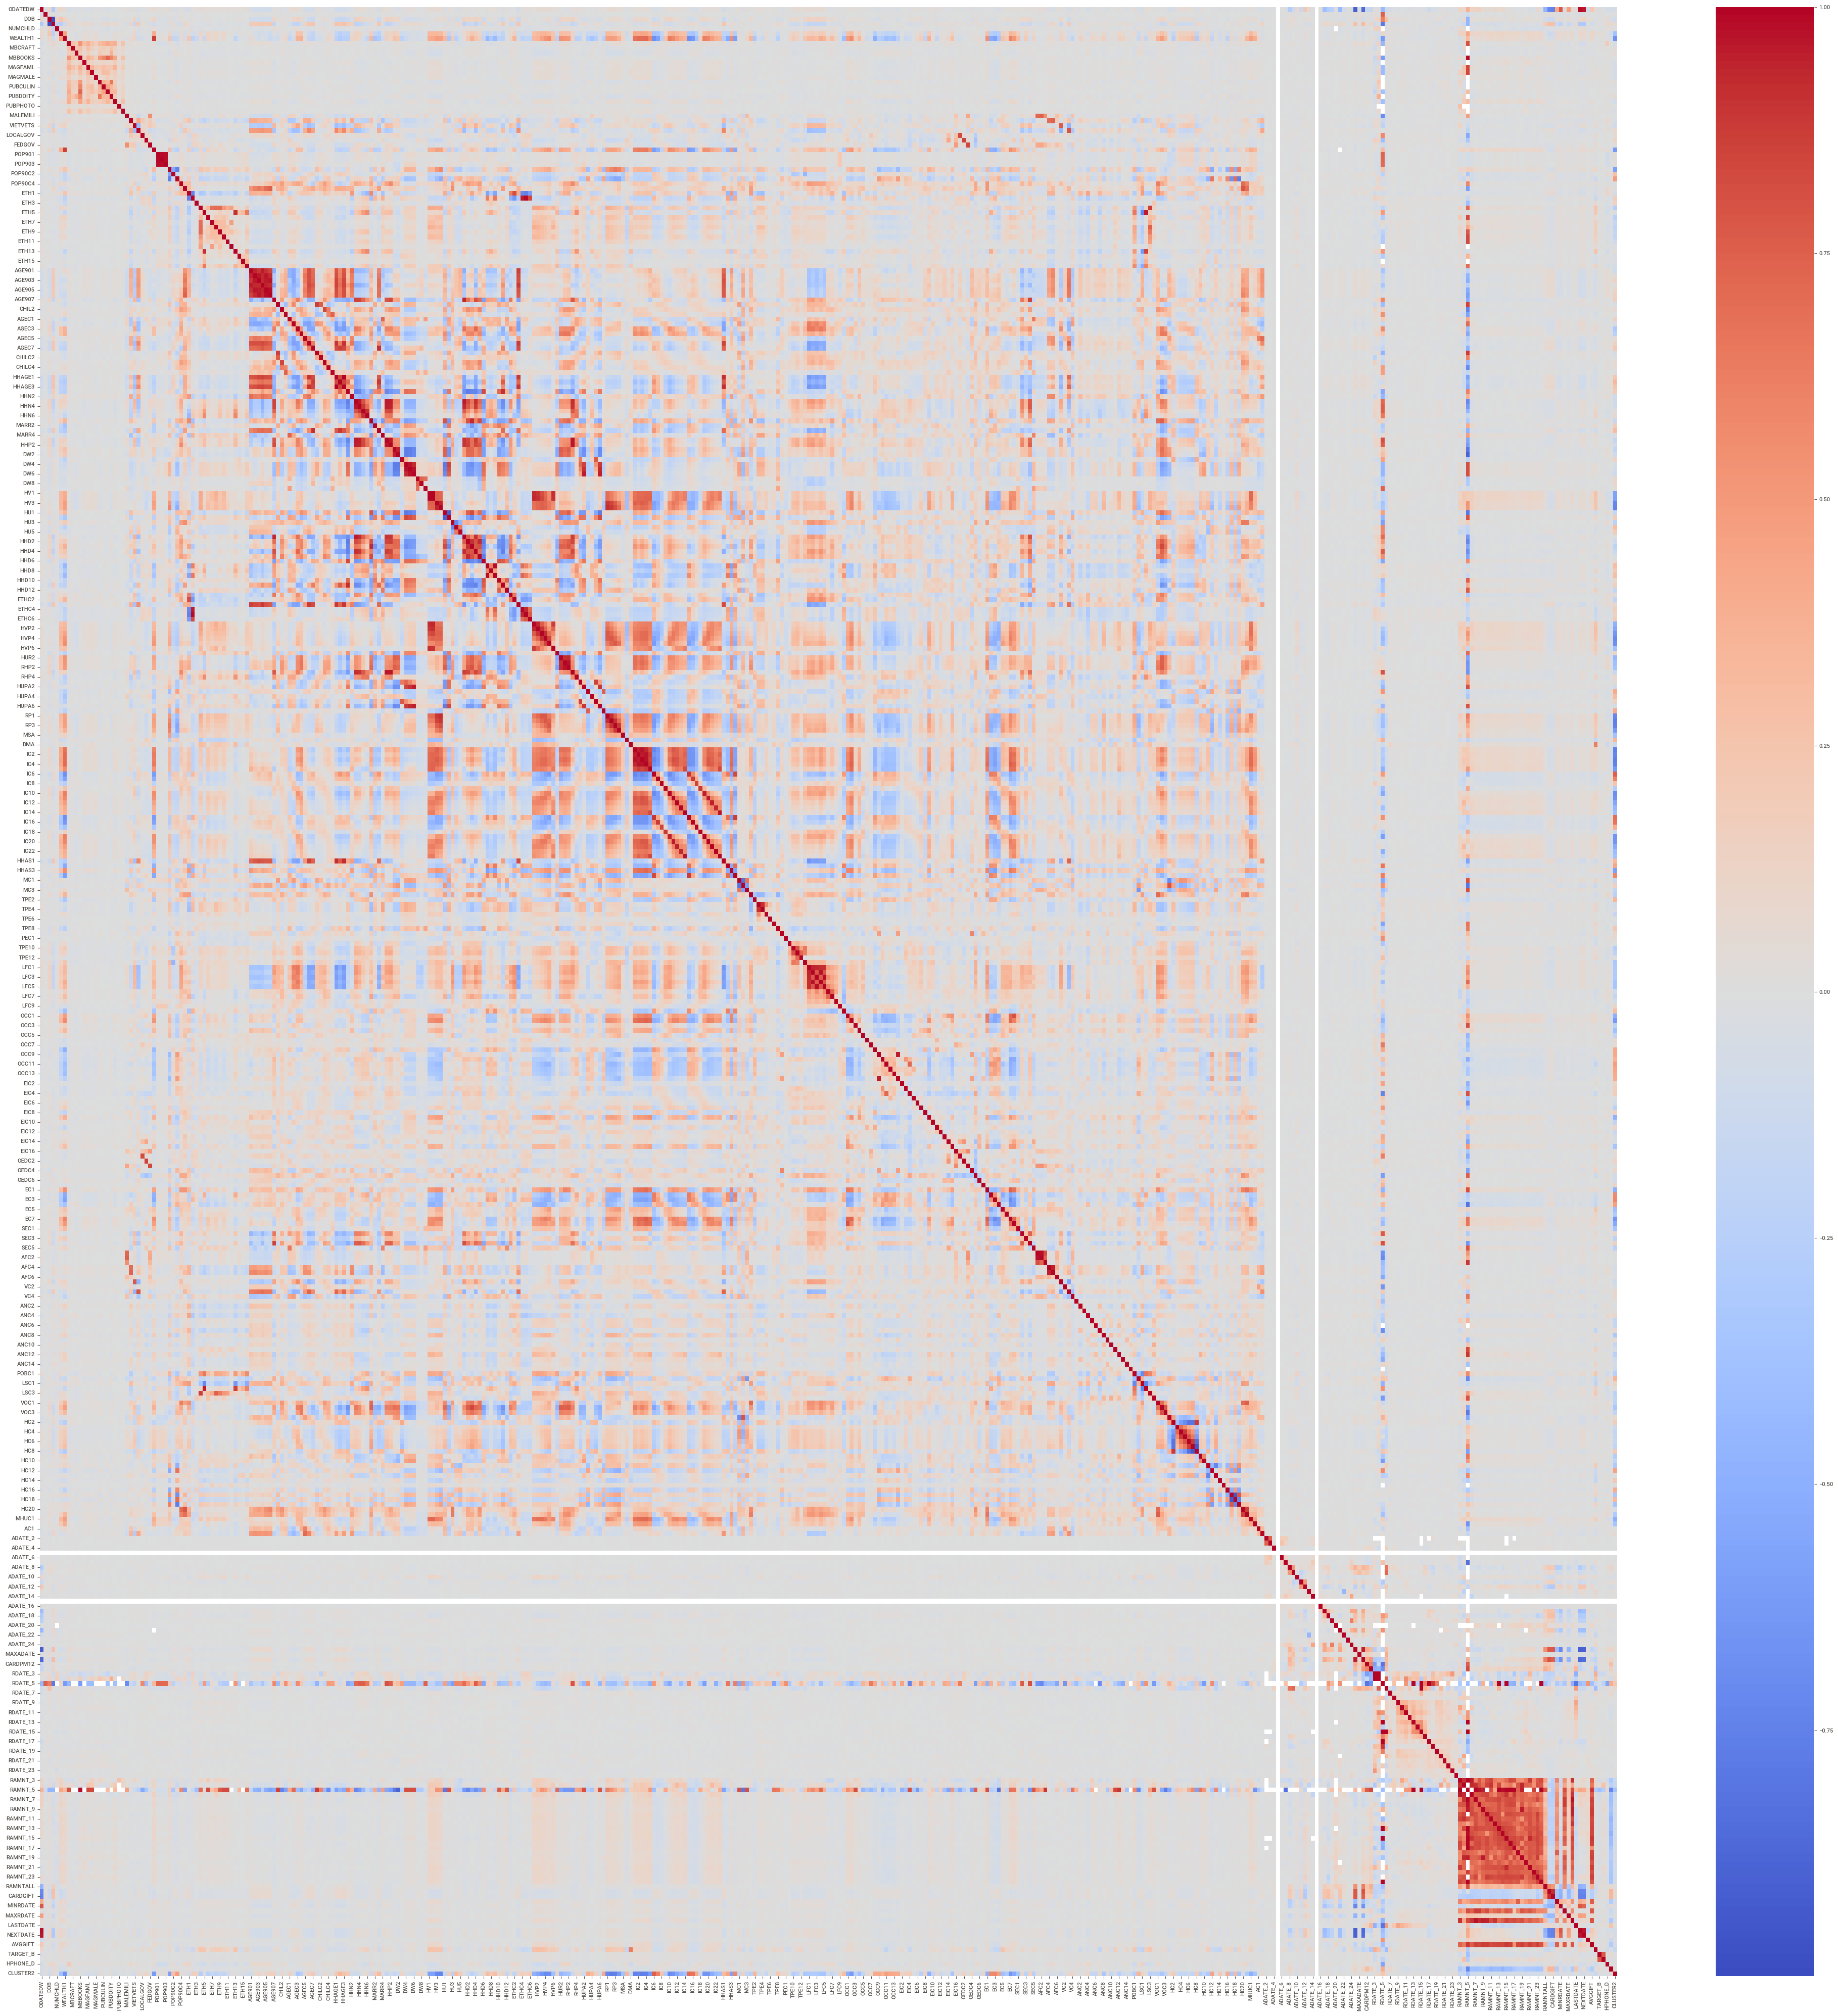

In [42]:
# Plot correlations
plt.figure(figsize=(40, 40))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=False, cmap='coolwarm')
plt.tight_layout()
#plt.savefig('./figures/correlation_matrix.png', bbox_inches='tight')
plt.show()

### Outlier Detection

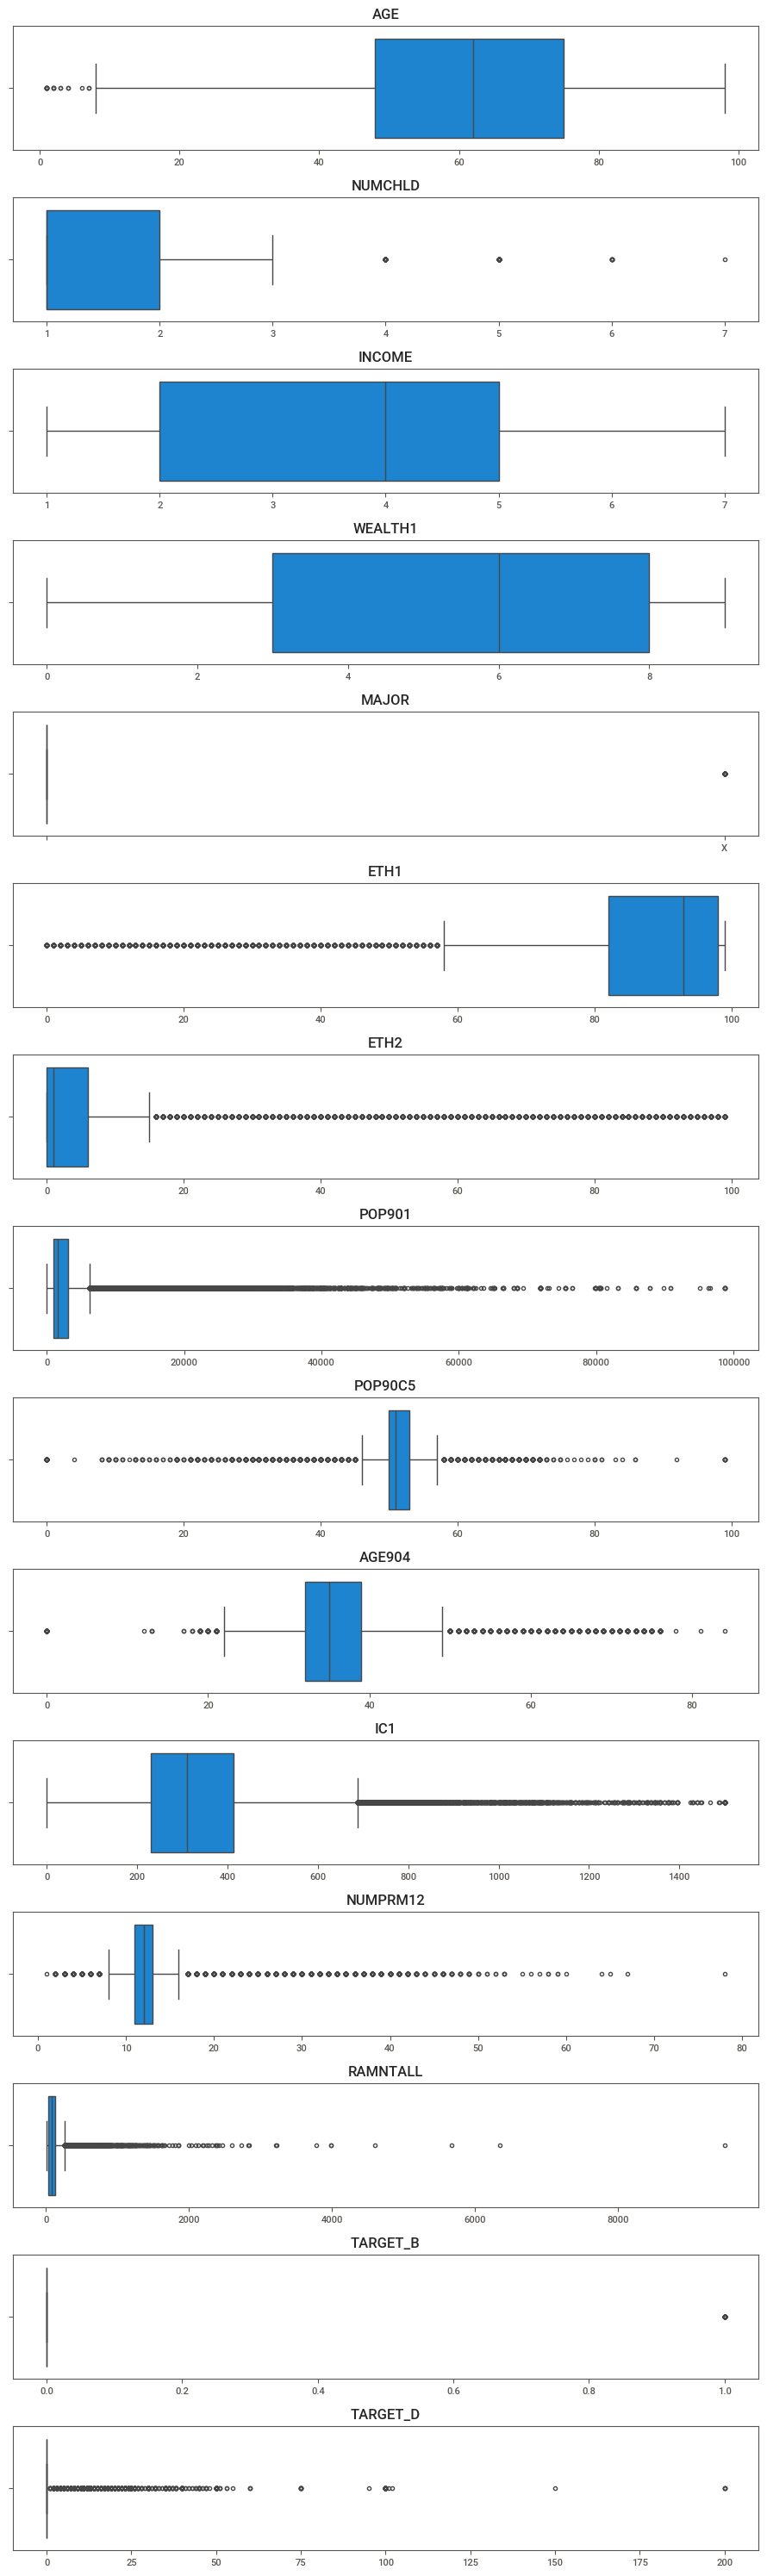

In [43]:
# Visualizing outliers
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(9, 2 * len(columns_to_plot)))

# Individual boxplots
for i, col in enumerate(columns_to_plot):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
#plt.savefig('boxplots.png') 
plt.show()

In [44]:
# Univariate outlier detection using IQR
uni_outliers = {}
df_num = df.select_dtypes(include=['number'])
for col in df_num.columns:
    q1 = df_num[col].quantile(0.25)
    q3 = df_num[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 3 * iqr
    upper_bound = q3 + 3 * iqr
    uni_outliers[col] = df_num[(df_num[col] < lower_bound) | (df_num[col] > upper_bound)].index
uni_outliers

{'ODATEDW': Index([], dtype='int64'),
 'TCODE': Index([   18,    32,    53,    54,    57,    65,   122,   126,   127,   129,
        ...
        95293, 95311, 95312, 95328, 95368, 95385, 95386, 95387, 95401, 95405],
       dtype='int64', length=10590),
 'DOB': Index([], dtype='int64'),
 'AGE': Index([], dtype='int64'),
 'NUMCHLD': Index([12687, 15043, 37107, 52817, 55505, 55714, 84553, 94244], dtype='int64'),
 'INCOME': Index([], dtype='int64'),
 'WEALTH1': Index([], dtype='int64'),
 'HIT': Index([    1,     4,    12,    14,    32,    39,    64,    89,   102,   110,
        ...
        95307, 95310, 95311, 95332, 95350, 95357, 95372, 95387, 95393, 95396],
       dtype='int64', length=7663),
 'MBCRAFT': Index([    4,    12,    24,    27,    39,    44,   156,   185,   198,   209,
        ...
        95191, 95250, 95271, 95301, 95307, 95311, 95329, 95335, 95350, 95388],
       dtype='int64', length=4851),
 'MBGARDEN': Index([   12,    27,    39,   156,   231,   242,   289,   311,   332,  

In [45]:
# Multivariate outlier detection using Mahalanobis distance
"""
imputer = SimpleImputer(strategy='mean')
df_num_imputed = pd.DataFrame(imputer.fit_transform(df_num), columns=df_num.columns)
mcd = MinCovDet()
mcd.fit(df_num_imputed.dropna())
mahalanobis = mcd.mahalanobis(df_num_imputed.dropna())
mahalanobis_series = pd.Series(mahalanobis)
multi_outliers = df_num_imputed[mahalanobis > mahalanobis_series.quantile(0.99)].index
multi_outliers
"""

"\nimputer = SimpleImputer(strategy='mean')\ndf_num_imputed = pd.DataFrame(imputer.fit_transform(df_num), columns=df_num.columns)\nmcd = MinCovDet()\nmcd.fit(df_num_imputed.dropna())\nmahalanobis = mcd.mahalanobis(df_num_imputed.dropna())\nmahalanobis_series = pd.Series(mahalanobis)\nmulti_outliers = df_num_imputed[mahalanobis > mahalanobis_series.quantile(0.99)].index\nmulti_outliers\n"

In [46]:
# Save the outliers to a file (to not recompute them every time)
"""
f = open("./data/multiout.txt", "a")
f.write(str(multi_outliers.values.tolist()))
f.close()
"""

'\nf = open("./data/multiout.txt", "a")\nf.write(str(multi_outliers.values.tolist()))\nf.close()\n'

### Significance testing

*Categorical*

In [60]:
def sig_tests(df, feats, target, alpha):
    
    keep = []
    
    for feature in feats:
        try:
            x = df[feature]
        except:
            continue

        contingency_table = pd.crosstab(df[feature], df[target])
        
        # Chi-squared test
        chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
        print("Chi-squared test for", feature)
        print("Chi2 statistic:", chi2_stat)
        print("P-value:", p_value)
        if p_value < alpha:
            print("The association between", feature, "and", target, "is significant.")
        else:
            print("The association between", feature, "and", target, "is not significant.")
        
        fisher_p_value = None
        if contingency_table.shape[0] == 2:
            # Fisher's exact test
            odds_ratio, fisher_p_value = fisher_exact(contingency_table)
            print("\nFisher's exact test for", feature)
            print("Odds ratio:", odds_ratio)
            print("P-value:", fisher_p_value)
            if fisher_p_value < alpha:
                print("The association between", feature, "and", target, "is significant.")
            else:
                print("The association between", feature, "and", target, "is not significant.")
        print("\n")
        
        if fisher_p_value is not None:
            if p_value < alpha and fisher_p_value < alpha:
                keep.append(feature)
        else:
            if p_value < alpha:
                keep.append(feature)
        
    return keep

In [61]:
significant_cat_feats = sig_tests(df, cat_feats, 'TARGET_B', 0.05)

Chi-squared test for OSOURCE
Chi2 statistic: 1174.3458922112177
P-value: 7.990179343674754e-10
The association between OSOURCE and TARGET_B is significant.


Chi-squared test for TCODE
Chi2 statistic: 141.70815300118326
P-value: 8.426861227285361e-10
The association between TCODE and TARGET_B is significant.


Chi-squared test for STATE
Chi2 statistic: 132.57329305266734
P-value: 3.7480141672374413e-08
The association between STATE and TARGET_B is significant.

Chi-squared test for ZIP
Chi2 statistic: 19413.814743099934
P-value: 0.9958545269431777
The association between ZIP and TARGET_B is not significant.


Chi-squared test for MAILCODE
Chi2 statistic: 5.159366397893102
P-value: 0.0231213307582885
The association between MAILCODE and TARGET_B is significant.


FloatingPointError: underflow encountered in _hypergeom_pdf

### EDA Report with sweetviz

In [ ]:
import sweetviz as sv

In [ ]:
feature_config = sv.FeatureConfig(force_num=num_feats, force_cat=(cat_feats))

In [ ]:
analyze_report = sv.analyze(df, target_feat='TARGET_B', feat_cfg=feature_config, pairwise_analysis='off')

In [ ]:
analyze_report.show_html()